<a href="https://colab.research.google.com/github/alouwyck/maxsypy/blob/main/seminaries/UM6P_jan_2025/Seminary_UM6P_Jan_2025_Part_6_Axisymmetric_flow_in_multilayer_aquifer_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

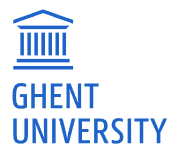<br>


**Axisymmetric Flow in Multilayer Aquifer Systems**<br>
Seminary on Groundwater Modeling<br>
University Mohammed VI Polytechnic<br>
January 6, 2025<br>
Dr. Andy Louwyck

---



---

# **Part 6 - Axisymmetric Flow in Multilayer Aquifer Systems**

This notebook contains some code examples to illustrate the use of axisymmetric multilayer well-flow solutions discussed in the sixth part of the presentation. The explanation provided with each example is relatively concise. To gain a good understanding of what's going on, I recommend reading the notebook side by side with the slides. For a full comprehension of the discussed models, I refer to [my PhD thesis](https://github.com/alouwyck/PhD) (Louwyck, 2023).

## 0. Import statements

We need the following libraries:
- [NumPy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)

Importing module `inspect` will allow us to print the source code of the functions implemented in the `maxsypy` package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import inspect

We also clone the MAxSyPy package from GitHub for simulating axisymmetric groundwater flow:

In [2]:
import os, shutil

# remove directory 'maxsypy' first if it already exists
path = "maxsypy"
if os.path.exists(path):
    shutil.rmtree(path)

# clone maxsypy repository from Github
!git clone https://github.com/alouwyck/maxsypy


# put maxsypy package directory in the current working directory
os.rename(path, 'temp')
shutil.copytree(os.path.join('temp', path), path);
shutil.rmtree('temp')

Cloning into 'maxsypy'...
remote: Enumerating objects: 244, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 244 (delta 9), reused 5 (delta 5), pack-reused 233 (from 2)
Receiving objects: 100% (244/244), 12.92 MiB | 18.22 MiB/s, done.
Resolving deltas: 100% (116/116), done.


The [MAxSyPy](https://github.com/alouwyck/maxsypy) package implements several analytical and semi-analytical solutions discussed in my PhD thesis (Louwyck, 2023).

We will also use the [TimML](https://timml.readthedocs.io/en/latest) and [TTim](https://ttim.readthedocs.io/en/latest) packages:

In [3]:
!pip install timml ttim -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s eta 0:00:00


In [4]:
import timml, ttim

## 1. The Hemker solutions

In previous notebooks, specific axisymmetric models were illustrated. The solutions of these models are available from module `maxsypy.special`.

The generalized multilayer solutions for steady and transient multilayer flow developed by Hemker are implemented respectively in classes `Steady` and `Transient`, and can be imported from module `maxsypy.multilayer`:

In [5]:
from maxsypy.multilayer import Steady, Transient

In [6]:
print(inspect.getdoc(Steady))

Class to simulate steady two-dimensional radial or parallel flow in a multilayer aquifer system.

Parameters
----------
T : array_like
  Layer transmissivities [L²/T]. The length of `T` is equal to the number of layers.
Q : array_like, default: `None`
  Discharges [L³/T] at inner model boundary. The length of `Q` is equal to the number of layers.
h_in : array_like, default: `None`
     Constant heads [L] at inner model boundary. The length of `h_in` is equal to the number of layers.
c : array_like
  Vertical resistances [T] between layers. The length of `c` is the number of layers minus one.
c_top : float, default: `inf`
      Vertical resistance [T] of the upper boundary of the aquifer system.
      By default, the upper boundary is impervious.
h_top : float, default: `0.0`
      Constant head [L] of the upper boundary condition.
c_bot : float, default: `inf`
      Vertical resistance [T] of the lower boundary of the aquifer system.
      By default, the lower boundary is impervious.


In [7]:
print(inspect.getdoc(Transient))

Class to simulate transient two-dimensional radial or parallel flow in a multilayer aquifer system.

Parameters
----------
T : array_like
  Layer transmissivities [L²/T]. The length of `T` is equal to the number of layers.
S : array_like
  Layer storativities [-]. The length of `S` is equal to the number of layers.
Q : array_like, default: `None`
  Discharges [L³/T] at inner model boundary. The length of `Q` is equal to the number of layers.
h_in : array_like, default: `None`
     Constant heads [L] at inner model boundary. The length of `h_in` is equal to the number of layers.
c : array_like
  Vertical resistances [T] between layers. The length of `c` is the number of layers minus one.
c_top : float, default: `inf`
      Vertical resistance [T] of the upper boundary of the aquifer system.
      By default, the upper boundary is impervious.
h_top : float, default: `0.0`
      Constant head [L] of the upper boundary condition.
c_bot : float, default: `inf`
      Vertical resistance [T] 

Let's illustrate the use of these classes by constructing the following three-layer model:

In [8]:
T = [100, 200, 50]            # aquifer transmissivities (m²/d)
S = [0.1, 0.05, 0.01]         # aquifer storativities (-)
c = [100, 500, 1000, np.inf]  # aquitard resistances (d)
Q = [-100, -250, 0]           # pumping rates (m³/d)

The steady-state and transient-state are instantiated as follows:

In [9]:
steady = Steady(T=T, Q=Q, c_top=c[0], c=c[1:-1], c_bot=c[-1])
transient = Transient(T=T, S=S, Q=Q, c_top=c[0], c=c[1:-1], c_bot=c[-1])

Head or drawdown is simulated by invoking method `h` on these model objects. In case of a steady-state model, only distances `r` are passed:

> `s1 = steady.h(r)`

The transient-state model also needs times `t`:

> `s2 = transient.h(r, t)`

Let's illustrate the use of these methods by creating the time-drawdown and the distance-drawdown graphs for this example:

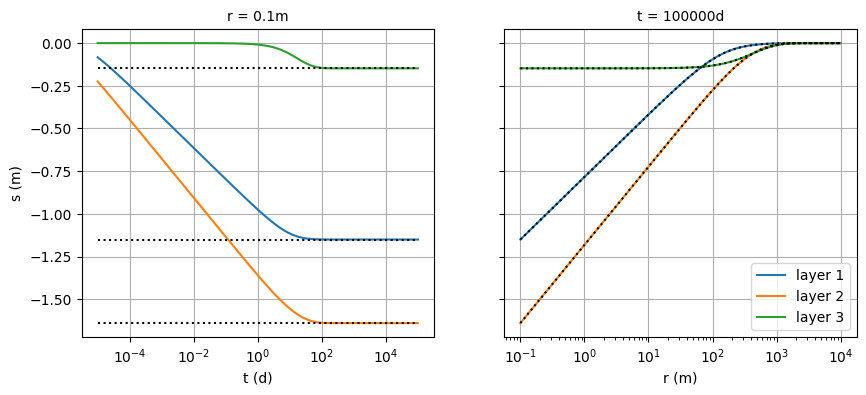

In [10]:
r = np.logspace(-1, 4, 100)  # radial distances (m)
t = np.logspace(-5, 5, 100)  # simulation times (d)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True);

ax1.semilogx(t, transient.h(r[0], t).squeeze().T);  # transient drawdown (m)
ax1.semilogx(t[[0, -1]], steady.h([r[0], r[0]]).T, 'k:');  # steady-state drawdown (m)
ax1.set_ylabel('s (m)');
ax1.set_xlabel('t (d)');
ax1.set_title('r = ' + str(r[0]) + 'm', fontdict=dict(size=10));
ax1.grid();

ax2.semilogx(r, transient.h(r, t[-1]).squeeze().T);  # transient drawdown (m)
ax2.semilogx(r, steady.h(r).T, 'k:');  # steady-state drawdown (m)
ax2.legend([f'layer {i+1}' for i in range(steady.nl)]);
ax2.set_xlabel('r (m)');
ax2.set_title('t = ' + str(int(t[-1])) + 'd', fontdict=dict(size=10));
ax2.grid();

We see that that steady state is reached after approximately 100 days of pumping.

Note that the same classes can be used to simulate **parallel flow** in a multilayer aquifer system. As an example, consider a river with a half-width of 10 m in which the water level is increased by 1 m:

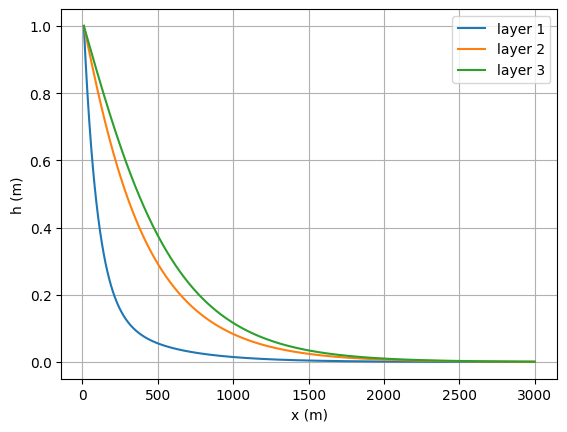

In [11]:
river = Steady(T=T, c_top=c[0], c=c[1:-1], c_bot=c[-1],  # hydraulic parameters
               r_in=10,         # half-width of the river is 10 m
               h_in=[1, 1, 1],  # instead of pumping rate Q, a constant head h_in equal to 1 m is defined
               axi=False)       # by default axi is True, but in case of parallel flow, it is set to False

x = np.linspace(river.r_in, 3000, 1000)  # horizontal distances (m)
h = river.h(x)  # head change (m)

plt.plot(x, h.T);
plt.legend([f'layer {i+1}' for i in range(river.nl)]);
plt.xlabel('x (m)');
plt.ylabel('h (m)');
plt.grid();

## 2. TimML and TTim

The well-flow example can also be simulated using TimML and TTim, with the former used for the steady-state simulation and the latter for the transient-state simulation. Both packages actually apply the Hemker solution method, so we should be able to reproduce the same results!

Let's start with the steady-state solution:

In [12]:
model = timml.ModelMaq(
    z=[6, 5, 4, 3, 2, 1, 0],  # set layer thicknesses to unity, and also include resistance layers
    kaq=T,                    # we use T as the layer thicknesses are set to unity
    c=c[:-1],                 # the lower boundary is always impermeable, i.e. c -> inf
    topboundary='semi',       # the top boundary is leaky or semi-confined
    hstar=0                   # to simulate drawdowns set constant head above semi-confining top to zero
)

upper_well = timml.Well(
    model,     # add the well to the model
    Qw=-Q[0],  # the first pumping rate
    layers=0   # resistance layers are not included in the numbering!
)

lower_well = timml.Well(
    model,     # add the well to the model
    Qw=-Q[1],  # the second pumping rate
    layers=1   # resistance layers are not included in the numbering!
)

model.solve()  # solve the model

s_tim = np.array([model.head(x=0, y=r) for r in r])  # get the drawdowns at distances r

Comparing the TimML result with the solution obtained from the `Steady` model:

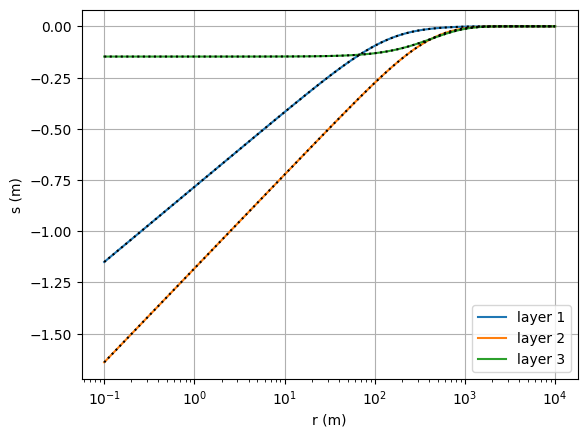

In [13]:
plt.semilogx(r, steady.h(r).T, '-');  # steady-state drawdown (m)
plt.semilogx(r, s_tim, 'k:');         # TimML drawdown (m)

plt.legend([f'layer {i+1}' for i in range(steady.nl)]);
plt.xlabel('r (m)');
plt.ylabel('s (m)');
plt.grid();

The drawdown curves are virtually the same, as they should!

To obtain the transient-state solution, we have to use TTim:

In [14]:
model = ttim.ModelMaq(
    z=[6, 5, 4, 3, 2, 1, 0],  # set layer thicknesses to unity, and also include resistance layers
    kaq=T,                    # we use T as the layer thicknesses are set to unity
    Saq=S,                    # and we use S for the same reason
    c=c[:-1],                 # the lower boundary is always impermeable, i.e. c -> inf
    topboundary='semi',       # the top boundary is leaky or semi-confined
    tmin=t[0],                # the minimum time for which heads can be computed
    tmax=t[-1]                # the maximum time for which heads can be computed
)

upper_well = ttim.Well(
    model,                # add the well to the model
    tsandQ=[(0, -Q[0])],  # the first pumping rate
    layers=0,             # resistance layers are not included in the numbering!
    rw=1e-5               # well radius -> 0
)

upper_well = ttim.Well(
    model,                # add the well to the model
    tsandQ=[(0, -Q[1])],  # the second pumping rate
    layers=1,             # resistance layers are not included in the numbering!
    rw=1e-5               # well radius -> 0
)

model.solve()  # solve the model

s_tim = np.array(model.head(x=0, y=r[0], t=t))  # get the drawdowns at distances r[0]

self.neq  2
solution complete


Comparing the TTim result with the solution obtained from the `Transient` model:

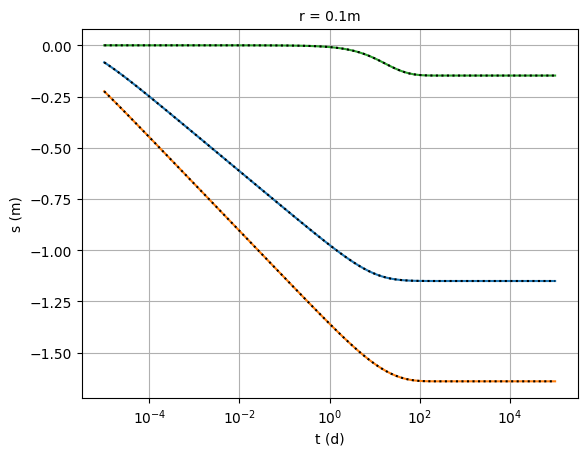

In [15]:
plt.semilogx(t, transient.h(r[0], t).squeeze().T);  # transient drawdown (m)
plt.semilogx(t, s_tim.T, 'k:');                     # TTim drawdown (m)

plt.xlabel('t (d)');
plt.ylabel('s (m)');
plt.title('r = ' + str(r[0]) + 'm', fontdict=dict(size=10));
plt.grid();

Again, the drawdown curves are virtually identical, as expected!

## 3. MODFLOW procedure


Remember that the Hemker solutions can also simulate parallel flow. This is because both axisymmetric and parallel flows are two-dimensional problems, solved using a profile model that represents a vertical slice or cross-section of the groundwater flow system.

Finite-difference models such as MODFLOW that use a three-dimensional rectilinear grid are well-suited for the simulation of parallel flow, as profile models simply require a grid consisting of a number of layers and columns, and one row of unit width. Layer thicknesses and column widths can be set without modification, as are all input parameters.

Simulating axisymmetric flow using a Cartesian grid geometry is also possible, but in this case, the model input requires some modifications to account for the required cylindrical grid geometry. In other words, the parallel flow equations must be transformed to the corresponding axisymmetric flow equations by modifying the input parameters.

This section illustrates how this transformation is done using MODFLOW-2005. We'll use [FloPy](https://flopy.readthedocs.io/en/stable/), the Python package to run MODFLOW-related groundwater programs with Python scripts:


In [16]:
!pip install flopy -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.5 MB/s eta 0:00:00


After FloPy is installed, MODFLOW and related programs must be installed:

In [17]:
!get-modflow :flopy

auto-selecting option ':flopy' for 'bindir'
fetched release '20.0' info from MODFLOW-USGS/executables
downloading 'https://github.com/MODFLOW-USGS/executables/releases/download/20.0/linux.zip' to '/tmp/tmpy9pckeae/modflow_executables-20.0-linux.zip'
extracting 25 files to '/root/.local/share/flopy/bin'
crt (1.3.1)         mflgr (2.0.0)       mp6 (6.0.1)         vs2dt (3.3)
gridgen (1.0.02)    mflgrdbl (2.0.0)    mp7 (7.2.001)       zbud6 (6.6.0)
libmf6.so (6.6.0)   mfnwt (1.3.0)       mt3dms (5.3.0)      zonbud3 (3.01)
mf2000 (1.19.01)    mfnwtdbl (1.3.0)    mt3dusgs (1.1.0)    zonbudusg (1.5)
mf2005 (1.12.00)    mfusg (1.5)         sutra (4.0)
mf2005dbl (1.12.00) mfusgdbl (1.5)      swtv4 (4.00.05)
mf6 (6.6.0)         mfusg_gsi (2.4.0)   triangle (1.6)
wrote new flopy metadata file: '/root/.local/share/flopy/get_modflow.json'


Finally, we import the `flopy` package and module `warnings` to ignore the `DeprecationWarning` we get after importing `flopy`.

In [18]:
import flopy
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

When simulation axisymmetric flow, it is recommended to use the double-precision version of MODFLOW-2005:

In [19]:
print(flopy.which("mf2005dbl"))  # check where mf2005dbl.exe is located

/root/.local/share/flopy/bin/mf2005dbl


We'll store the MODFLOW input files in directory `'./modflow'`:

In [20]:
from pathlib import Path

if Path('./modflow').exists():
    !rm -rf modflow
!mkdir modflow

We create a `Modflow` object:

In [21]:
workspace = Path('./modflow')
name = "axisym"
mf = flopy.modflow.Modflow(name, exe_name="mf2005dbl", model_ws=workspace)

We'll use MODFLOW to simulate a **Theis model** with the following input parameters:

In [22]:
T = 100     # aquifer transmissivity (m²/d)
S = 0.1     # aquifer storativity (-)
Q = -100.0  # pumping rate (m³/d)

The axisymmetric grid consists of 60 rings, so we define 60 columns in the MODFLOW grid. We need one layer only for simulating a Theis model, and we set its thickness to unity as transmissivity and storativity are given. Since we are building a profile model, we define one row of unit width. The width of the columns is also set to 1, since the width of each ring is included by modifying the aquifer parameters:

In [23]:
nlay = 1           # Theis model has 1 layer only
nrow = 1           # profile model has 1 row
ncol = 60          # number of columns = number of rings
delr = delc = 1.0  # row height = column width = 1
D = 1.0            # layer thickness is set to unity because T and S are given

The Theis model simulates transient flow, so we have to define simulation times:

In [24]:
t = np.logspace(-5, 1, 100)  # simulation times (d)

Now we have defined the grid parameters and the simulation times, we can create the discretization object:

In [25]:
nper = len(t)                               # number of stress periods = len(t)
perlen = np.hstack((t[0], t[1:] - t[:-1]))  # length of stress period k = t[k+1] - t[k]
nstp = np.ones(nper)                        # number of time steps for each stress period is 1
steady = np.zeros(nper, dtype=bool)         # all stress periods are transient, so steady is set to False

dis = flopy.modflow.ModflowDis(
    mf,
    nlay, nrow, ncol, delr=delr, delc=delc, top=D, botm=0.0,
    nper=nper, perlen=perlen, nstp=nstp, steady=steady,
)

In the Basic package, each cell is defined as a variable-head cell, and its starting head is set to zero because we want to simulate drawdowns:

In [26]:
ibound = np.ones((nlay, nrow, ncol), dtype=np.int32)   # variable-head cells
strt = np.zeros((nlay, nrow, ncol), dtype=np.float32)  # starting head is zero to simulate drawdowns
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

Let's **convert the aquifer parameters** to account for the axisymmetric grid geometry, which is defined by the radii `rb` of the boundaries between the rings:

In [27]:
rb = np.logspace(-1, 5, ncol+1)  # radii (m) of the cylindrical surfaces defining the rings
hk = 2 * np.pi * T / np.log(rb[1:] / rb[:-1])  # MODFLOW input for horizontal conductivity

rb2 = rb**2
ss = np.pi * (rb2[1:] - rb2[:-1]) * S  # MODFLOW input for specific storage

The transformed parameters are assigned to the LPF object:

In [28]:
lpf = flopy.modflow.ModflowLpf(
    mf,
    hk=hk[np.newaxis, np.newaxis, :],  # reshape to (nlay, nrow, ncol)
    ss=ss[np.newaxis, np.newaxis, :],  # reshape to (nlay, nrow, ncol)
    laytyp=0,  # confined to keep layer thickness constant
    layavg=0   # use harmonic mean for calculation of effective conductivities
)

The pumping well is added to the first ring:

In [29]:
stress_period_data = {}
for kper in range(nper):  # well is added to each stress period
    stress_period_data[kper] = [0, 0, 0, Q]  # well is added to first ring
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)

We'll simulate the MODFLOW model using the SIP solver:

In [30]:
sip = flopy.modflow.ModflowSip(mf)

Using the output control package OC, we indicate that heads must be printed and saved for each stress period:

In [31]:
stress_period_data = {}
for kper in range(nper):  # loop over all stress periods
    stress_period_data[(kper, 0)] = ["save head", "print head"]  # save and print heads
oc = flopy.modflow.ModflowOc(mf, stress_period_data=stress_period_data, compact=True)

Writing the input files to the workspace folder:

In [32]:
mf.write_input()

Running the model:

In [33]:
success, buff = mf.run_model()
assert success, "MODFLOW did not terminate normally."

FloPy is using the following executable to run the model: ../../root/.local/share/flopy/bin/mf2005dbl

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: axisym.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2024/12/27  2:14:17

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     3    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     4    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     5    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     6    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     7    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     8    Time step

The simulation is successful! Extracting the simulated drawdowns from the binary output file:

In [34]:
import flopy.utils.binaryfile as bf

hds = bf.HeadFile(Path(workspace) / f"{name}.hds")

s_mf = []
for kper in range(nper):  # read all stress periods
    s_mf.append(hds.get_data(kstpkper=(0, kper)).squeeze())
s_mf = np.array(s_mf)

s_mf.shape

(100, 60)

Let's calculate the drawdowns using function `theis`:

In [35]:
from maxsypy.special import theis

r = np.sqrt(rb[:-1] * rb[1:])  # radii (m) of the nodal circles
s = theis(r=r, t=t, T=T, S=S, Q=Q).T  # drawdown (m) calculated using the Theis formula

s.shape

(100, 60)

Plotting and comparing the results of both simulations:

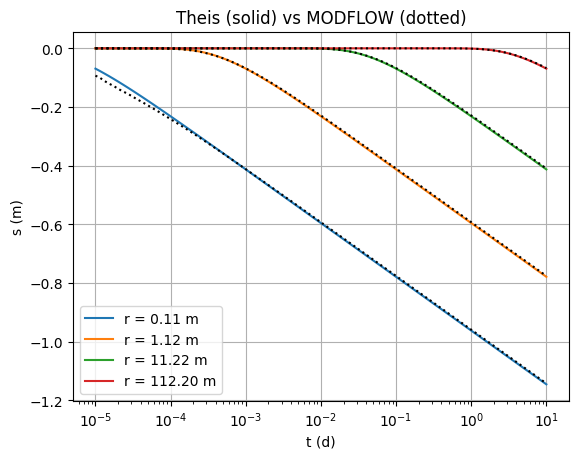

In [36]:
i = range(0, 40, 10)  # select 4 radial distances (m)
plt.semilogx(t, s[:, i], '-',  # Theis drawdown (m)
             t, s_mf[:, i], 'k:');  # MODFLOW drawdown (m)

plt.title('Theis (solid) vs MODFLOW (dotted)');
plt.legend([f'r = {r:.2f} m' for r in r[i]]);
plt.xlabel('t (d)');
plt.ylabel('s (m)');
plt.grid();

The curves simulated with MODFLOW match very well with the curves calculated using the Theis formula! Only at very small values of times is there a slight deviation due to the discretization of the MODFLOW model.

Applying the presented MODFLOW procedure can be particularly useful when accurate simulation of axisymmetric flow with radially varying aquifer parameters is needed. For example, this can be important when considering a gravel pack or finite-thickness skin around the well. And of course, it also straightforward to simulate flow in a multilayer system.

---